In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
X = [
    [1.3, 6],
    [3.5, 5],
    [4.2, 2],
    [5.3, 3],
    [2, 9],
    [5,7.5],
    [7.2,4],
    [8.1,8],
    [9,2.5]
]

#特征值
y = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7]

In [38]:
X = np.array(X)

In [39]:
y = np.array(y)

In [41]:
data_new = np.array([4,5])

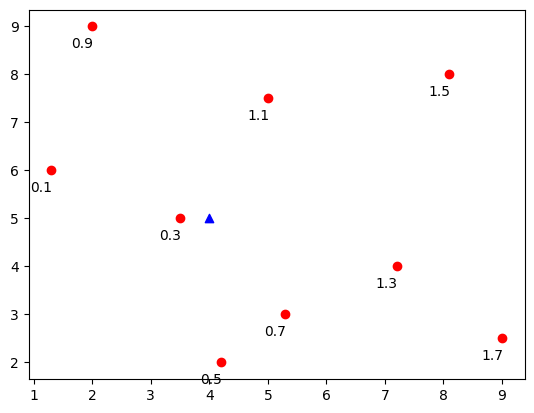

In [43]:
plt.scatter(X[:,0],X[:,1], color="red")
plt.scatter(data_new[0],data_new[1],color='b',marker='^')
for i in range(len(y)):
    plt.annotate(y[i], xy=X[i], xytext=(-15,-15), textcoords="offset points")
plt.show()

In [47]:
distance = [np.sqrt(np.sum((i-data_new)**2)) for i in X]
distance

[2.879236009777594,
 0.5,
 3.006659275674582,
 2.3853720883753127,
 4.47213595499958,
 2.692582403567252,
 3.3526109228480423,
 5.080354318352215,
 5.5901699437494745]

In [54]:
sort_index = np.argsort(distance)
sort_index

array([1, 3, 5, 0, 2, 6, 4, 7, 8], dtype=int64)

In [55]:
k = 5

In [56]:
first_k = [data_feature[i] for i in sort_index[:k]]
first_k

[0.3, 0.7, 1.1, 0.1, 0.5]

In [68]:
from collections import Counter
Counter(first_k).most_common()
# 返回出现最多的与次数

[(0.3, 1), (0.7, 1), (1.1, 1), (0.1, 1), (0.5, 1)]

In [69]:
predict_y = Counter(first_k).most_common(1)[0][0]    
# most_common(1)方法返回出现次数最多的元素及其计数，、取出第一个元素 [0]，最后使用 [0] 取出元素本身。
predict_y

0.3

In [61]:
k = 5
np.mean(first_k)

0.54

# scikit-learn 实现KNN回归

In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [71]:
knn_classifier = KNeighborsRegressor(n_neighbors=5)

In [73]:
knn_classifier.fit(X,y)

KNeighborsRegressor()

In [74]:
data_new = data_new.reshape(1,-1)

In [75]:
knn_classifier.predict(data_new)

array([0.54])

# KNN对于公开数据集的表现-房价

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn import datasets

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [128]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [129]:
y = target

In [130]:
X = data

In [131]:
X.shape, y.shape

((506, 13), (506,))

In [132]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=233)

In [135]:
from sklearn.neighbors import KNeighborsRegressor

In [136]:
knn_reg = KNeighborsRegressor(n_neighbors=5, p=2, weights="distance")

In [137]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

In [138]:
knn_reg.score(X_test,y_test)

0.49308828546554706

因为没有进行归一化

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
standard_scalar = StandardScaler()
standard_scalar.fit(X_train)

StandardScaler()

standard_scalar对象将根据训练数据集计算均值和标准差，并将其保存，以便后续用于将其他数据集进行相同的标准化处理。这样可以确保在模型训练和预测过程中，数据的特征具有相同的尺度，有助于提高模型的性能和稳定性。

In [141]:
X_train = standard_scalar.transform(X_train)

In [142]:
X_train

array([[-0.40284526, -0.48091484, -0.09511186, ...,  0.05097121,
         0.41443456,  0.60994432],
       [-0.40809106,  0.80378283, -0.92432569, ..., -0.86963118,
         0.21628014, -1.03808347],
       [-0.39222614, -0.48091484, -0.19619976, ..., -0.04108903,
         0.41593087, -0.66836862],
       ...,
       [ 1.04040647, -0.48091484,  1.00513476, ...,  0.78745311,
         0.45344554,  0.26751471],
       [-0.40789528, -0.48091484,  0.39274716, ..., -1.14581189,
         0.45344554, -0.89074323],
       [ 0.11862494, -0.48091484,  1.00513476, ...,  0.78745311,
         0.36067422, -0.18405582]])

In [143]:
X_test = standard_scalar.transform(X_test)

In [144]:
X_test

array([[ 0.94778563, -0.48091484,  1.00513476, ...,  0.78745311,
        -3.52514036,  0.39439102],
       [ 1.77139398, -0.48091484,  1.00513476, ...,  0.78745311,
         0.45344554,  0.0874322 ],
       [ 0.77153865, -0.48091484,  1.00513476, ...,  0.78745311,
        -3.32837537,  1.52536373],
       ...,
       [-0.39751333, -0.48091484, -0.1800843 , ..., -0.31726975,
         0.45344554,  0.58538762],
       [-0.39671343, -0.48091484, -0.63424735, ..., -0.27123963,
         0.40898371,  0.81867632],
       [ 0.02943193, -0.48091484,  1.00513476, ...,  0.78745311,
         0.43666548,  0.0096693 ]])

In [145]:
knn_reg.fit(X_train,y_train)

KNeighborsRegressor(weights='distance')

In [146]:
knn_reg.score(X_test,y_test)

0.8315777292735131